In [15]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import plotly as plt

In [2]:
melon = pd.read_csv('./melon_chart.csv')

In [3]:
all = pd.read_csv('./melon_chart_all.csv')

In [4]:
all.head()

,index,year,month,week,rank,song_id,title,artist,album,genre,album_id,album_score,album_score_count,album_reply,artist_id,fan,like,reply
0,0,2018,04월,04.02~04.08,1,30989550,바코드 (Prod. GroovyRoom),"['김하온 (HAON)', ' 빈첸 (VINXEN)']",고등래퍼2 팀대항전 Part 3,['랩/힙합'],10153531,3.6,6524,3876,"['2112493', '2113204']","['48578', '54257']",139311,1390
1,1,2018,04월,04.02~04.08,2,30948698,꽃 길,['BIGBANG'],꽃 길,['R&B/Soul'],10147314,4.2,23974,34939,['198094'],['301825'],181778,2571
2,2,2018,04월,04.02~04.08,3,30937275,별이 빛나는 밤,['마마무(Mamamoo)'],Yellow Flower,['댄스'],10145303,4.0,17652,34803,['750053'],['219494'],159528,1552
3,3,2018,04월,04.02~04.08,4,30859584,사랑을 했다 (LOVE SCENARIO),['iKON'],Return,['랩/힙합'],10132945,3.9,36710,96712,['895741'],['128191'],288511,5016
4,4,2018,04월,04.02~04.08,5,30997649,EVERYDAY,['WINNER'],EVERYD4Y,['랩/힙합'],10154916,4.5,32479,31202,['775197'],['211842'],136798,1482


In [6]:
all.describe()

,index,year,rank,song_id,album_id,album_score,album_score_count,album_reply,like,reply
count,8500.000000,8500.000000,8500.000000,8.500000e+03,8.500000e+03,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,4249.500000,2018.541176,50.500000,3.037899e+07,9.894233e+06,3.786235,23808.436118,29272.152824,137752.446471,1474.379882
std,2453.882977,0.498331,28.867768,4.700161e+06,1.528327e+06,0.794072,25396.016511,41378.292033,82349.839522,1860.456970
min,0.000000,2018.000000,1.000000,1.477600e+04,8.290000e+02,0.900000,465.000000,101.000000,5253.000000,22.000000
25%,2124.750000,2018.000000,25.750000,3.096253e+07,1.014949e+07,3.600000,5365.000000,2128.000000,76706.000000,390.000000
50%,4249.500000,2019.000000,50.500000,3.130620e+07,1.020396e+07,3.900000,13180.000000,8879.000000,131941.000000,835.000000
75%,6374.250000,2019.000000,75.250000,3.166642e+07,1.026086e+07,4.300000,32042.000000,40199.000000,178502.000000,1875.000000
max,8499.000000,2019.000000,100.000000,3.217594e+07,1.035189e+07,4.900000,121533.000000,262324.000000,440396.000000,12127.000000


## 알수 있는 것
* 8500개의 data
* '앨범 평점'의 5점만점에 평균은 3.78 중앙값은 3.9 (비슷) -> 하위의 곡들을 찾아보자
* '앨범 댓글 수'는 평균적으로 29272번 중앙값은 8879로 볼때 매우 극단적인 분포임을 알수 있음 -> 어떤곡이 상위인지 하위인지 알아보자 ^_^
* '곡 좋아요'평균적으로 137752번 중앙값은 131941번 (비슷) 
* '앨범 좋아요' 는 평균 1474번 중앙값은 835번 극단적인 분포임을 알수 있다 -> 어떤앨범이 상위인지 하위인지 알아보자

# 앨범 평점

## 1.앨범평점의 분포

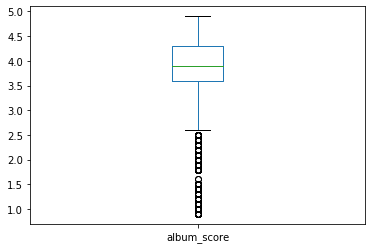

In [8]:
all['album_score'].plot(kind='box')

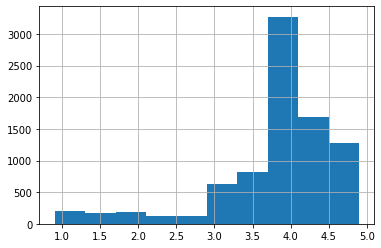

In [17]:
all['album_score'].hist()

In [25]:
low_score = all[all['album_score'] < 1.5]

In [29]:
low_score['album_score'].value_counts()

1.4    105
1.0     87
1.1     65
0.9     30
1.2     23
1.3     15
Name: album_score, dtype: int64

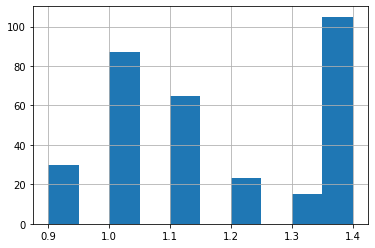

In [26]:
low_score['album_score'].hist()

In [33]:
low_score.groupby('title').size().sort_values(ascending = False)

title
지나오다                               70
Way Back Home                      69
넋두리                                35
이 노래가 클럽에서 나온다면                    30
내 안부                               18
대충 입고 나와                           17
알았다면                               16
비행운                                14
미운 날                               12
조금 취했어 (Prod. 2soo)                 8
지각                                  6
있어줘요                                6
이별행동                                6
시작됐나, 봄                             5
사랑에 연습이 있었다면 (답가)                   5
스무살이 왜이리 능글맞아 (Feat. 숀 (SHAUN))     4
혼코노 (Honkono)                       4
dtype: int64

In [67]:
low_score.groupby('title').mean().sort_values(by='album_score',ascending=True)

,index,year,rank,song_id,album_id,album_score,album_score_count,album_reply,like,reply
title,,,,,,,,,,
이 노래가 클럽에서 나온다면,5786.133333,2019.000000,37.133333,31576009.0,10245121.0,0.9,43561.0,32450.0,111849.0,3414.0
대충 입고 나와,6849.294118,2019.000000,50.294118,31835421.0,10291606.0,1.0,10500.0,2860.0,43848.0,337.0
지나오다,3482.842857,2018.442857,33.842857,30699142.0,10106853.0,1.0,92899.0,120742.0,216379.0,9616.0
미운 날,5305.750000,2019.000000,56.750000,31629490.0,10254316.0,1.1,18499.0,6249.0,37485.0,856.0
조금 취했어 (Prod. 2soo),8054.375000,2019.000000,5.375000,32059630.0,10331499.0,1.1,19859.0,11555.0,73970.0,1351.0
있어줘요,8157.500000,2019.000000,8.500000,32085144.0,10336518.0,1.1,15613.0,4357.0,51733.0,361.0
스무살이 왜이리 능글맞아 (Feat. 숀 (SHAUN)),2229.500000,2018.000000,80.500000,31257764.0,10196005.0,1.1,12615.0,4743.0,30702.0,615.0
넋두리,1742.400000,2018.000000,43.400000,9642570.0,2710553.0,1.1,15441.0,1649.0,103605.0,430.0
내 안부,7599.055556,2019.000000,50.055556,31929663.0,10307772.0,1.2,4970.0,1063.0,47818.0,178.0


## 2.앨범평점과 앨범좋아요 수의 연관성및 분포

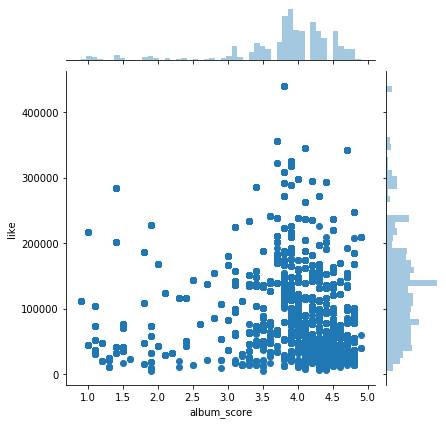

In [69]:
#조인트플롯
sns.jointplot(data = all, x='album_score', y='like')

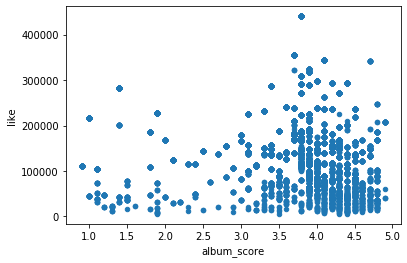

In [70]:
all.plot(kind ='scatter', x='album_score', y='like')

In [76]:
all.corr()

,index,year,rank,song_id,album_id,album_score,album_score_count,album_reply,like,reply
index,1.000000,0.863084,0.011764,0.137383,0.113490,-0.056799,-0.168097,-0.193391,-0.186582,-0.040597
year,0.863084,1.000000,0.000000,0.131082,0.109998,-0.050691,-0.147372,-0.173155,-0.145582,-0.018315
rank,0.011764,0.000000,1.000000,-0.056989,-0.058849,0.183930,0.108473,0.057896,-0.199482,-0.110381
song_id,0.137383,0.131082,-0.056989,1.000000,0.976659,-0.047489,0.091627,0.091159,-0.113758,0.080404
album_id,0.113490,0.109998,-0.058849,0.976659,1.000000,-0.050128,0.111398,0.111807,-0.085742,0.098117
album_score,-0.056799,-0.050691,0.183930,-0.047489,-0.050128,1.000000,-0.202275,-0.137428,-0.062278,-0.331228
album_score_count,-0.168097,-0.147372,0.108473,0.091627,0.111398,-0.202275,1.000000,0.826339,0.467847,0.642276
album_reply,-0.193391,-0.173155,0.057896,0.091159,0.111807,-0.137428,0.826339,1.000000,0.478947,0.679723
like,-0.186582,-0.145582,-0.199482,-0.113758,-0.085742,-0.062278,0.467847,0.478947,1.000000,0.600689
reply,-0.040597,-0.018315,-0.110381,0.080404,0.098117,-0.331228,0.642276,0.679723,0.600689,1.000000


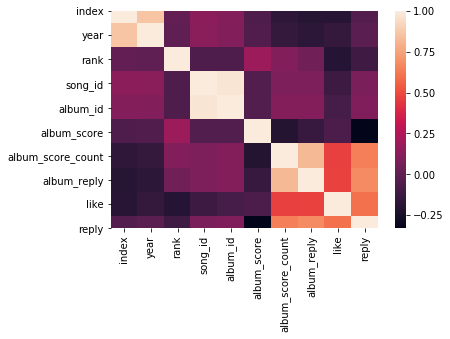

In [77]:
sns.heatmap(all.corr())

In [78]:
#sns.catplot(data=all, x='album_score', y='like', kind ='scatter', hue ='genre')

# 노래제목/장르/가수별 빈도수(2018~2019)

In [4]:
melon['title'].value_counts()

봄날                                       85
모든 날, 모든 순간 (Every day, Every Moment)    85
비                                        78
지나오다                                     70
Way Back Home                            69
                                         ..
우린 어디에나                                   1
눈이 내린다                                    1
GOTT (Feat. MOON, 우원재 & Jvcki Wai)        1
상상속에서                                     1
남아있는 노래처럼                                 1
Name: title, Length: 740, dtype: int64

In [5]:
melon['genre'].value_counts()

발라드                2383
댄스                 1753
랩/힙합               1626
R&B/Soul            748
발라드, 국내드라마          484
POP                 419
발라드, 인디음악           188
인디음악, 록/메탈          173
록/메탈                169
인디음악, 포크/블루스        136
인디음악, 일렉트로니카         80
랩/힙합, 인디음악           67
POP, 국외영화            56
POP, 록/메탈            53
록/메탈, 국내드라마          32
R&B/Soul, 인디음악       24
성인가요                 22
일렉트로니카               19
포크/블루스               15
랩/힙합, 국내드라마          13
R&B/Soul, 국내드라마      11
Flac 16/24bit         7
Flac 16bit            7
게임                    6
일렉트로니카, EDM           4
댄스, 국내드라마             2
재즈, 애시드/퓨전/팝          2
포크/블루스, 국내드라마         1
Name: genre, dtype: int64

In [6]:
melon['artist'].value_counts()

방탄소년단              779
폴킴                 283
Wanna One (워너원)    274
EXO                271
TWICE (트와이스)       202
                  ... 
반하나                  1
규현 (KYUHYUN)         1
카더가든                 1
SummerWish           1
40                   1
Name: artist, Length: 258, dtype: int64

In [7]:
melon['artist'].value_counts()

방탄소년단              779
폴킴                 283
Wanna One (워너원)    274
EXO                271
TWICE (트와이스)       202
                  ... 
반하나                  1
규현 (KYUHYUN)         1
카더가든                 1
SummerWish           1
40                   1
Name: artist, Length: 258, dtype: int64

## 발라드에서 2018-2019년동안 가장 많이 등장한 가수는?

In [8]:
melon[melon['genre'] =='발라드'].groupby('artist').size().sort_values(ascending = False)

artist
비투비             155
닐로(Nilo)        128
벤               118
엠씨더맥스            89
폴킴               84
               ... 
핑클 (Fin.K.L)      1
백지영               1
헨리 (HENRY)        1
신용재 (포맨)          1
육성재               1
Length: 88, dtype: int64

### 비투비는 어떤노래로 그럼 차트를 많이 차지했을까?

In [9]:
melon[melon['artist']=='비투비'].groupby('title').size().sort_values(ascending = False)

title
그리워하다                          63
너 없인 안 된다                      52
아름답고도 아프구나                     31
Friend                          7
The Feeling                     6
Blue Moon                       3
제발                              1
미안해 (Song by 서은광, 이민혁, 이창섭)     1
Call me                         1
dtype: int64

## 댄스에서 2018-2019년동안 가장 많이 등장한 가수는?

In [10]:
melon[melon['genre'] =='댄스'].groupby('artist').size().sort_values(ascending = False)

artist
TWICE (트와이스)                199
Wanna One (워너원)             198
EXO                         161
청하                          108
Red Velvet (레드벨벳)           103
마마무(Mamamoo)                 75
세븐틴                          70
WINNER                       68
BLACKPINK                    61
여자친구 (GFRIEND)               58
선미                           57
ITZY (있지)                    55
(여자)아이들                      49
EXO-CBX (첸백시)                48
모모랜드 (MOMOLAND)              48
IZ*ONE (아이즈원)                46
방탄소년단                        32
Apink (에이핑크)                 31
X1 (엑스원)                     28
화사(Hwa Sa)                   25
오마이걸                         25
승리                           20
Wanna One (워너원) - 트리플포지션     19
AOA                          18
이하이                          15
iKON                         15
뉴이스트 W                       11
Wanna One (워너원) - 남바완        10
전소미                          10
EXID                          9
소녀시대-Oh!GG                    8
갓

### 트와이스는 어떤노래로 그럼 차트를 많이 차지했을까?

In [11]:
melon[melon['artist']=='TWICE (트와이스)'].groupby('title').size().sort_values(ascending = False)

title
Dance The Night Away    57
YES or YES              39
FANCY                   30
What is Love?           29
Heart Shaker            21
LIKEY                   15
Feel Special             8
올해 제일 잘한 일               2
CHILLAX                  1
dtype: int64

## 랩/힙합에서 2018-2019년동안 가장 많이 등장한 가수는?

In [77]:
melon[melon['genre'] =='랩/힙합'].groupby('artist').size().sort_values(ascending = False)

artist
방탄소년단                699
기리보이                  84
BLACKPINK             75
김하온 (HAON)            66
iKON                  48
pH-1                  41
로꼬                    38
창모 (CHANGMO)          34
제니 (JENNIE)           33
Rohann (이로한)          30
MINO (송민호)            29
저스디스 (JUSTHIS)        27
에픽하이 (EPIK HIGH)      27
WINNER                25
빈첸 (VINXEN)           24
Jvcki Wai             24
우원재                   23
수퍼비                   22
MC몽                   20
염따                    18
강현준 (Lil tachi)       18
지코 (ZICO)             17
루피(Loopy)             16
BewhY (비와이)           16
헤이즈 (Heize)           15
오반                    14
쿠기 (Coogie)           14
펜타곤                   13
스윙스                   12
사이먼 도미닉               11
(여자)아이들                9
이영지                    7
나플라(nafla)             6
김민규 (Young Kay)        6
Woodie Gochild         5
세훈&찬열                  5
윤비 (YunB)              5
그루비룸 (GroovyRoom)      4
Kid Milli              4
마미손               

### 방탄소년단은 어떤노래로 그럼 차트를 많이 차지했을까?

In [72]:
melon[melon['artist']=='방탄소년단'].groupby('title').size().sort_values(ascending = False)

title
봄날                                         85
IDOL                                       65
DNA                                        54
FAKE LOVE                                  51
전하지 못한 진심 (Feat. Steve Aoki)               45
Anpanman                                   37
Euphoria                                   34
I`m Fine                                   34
Answer : Love Myself                       34
작은 것들을 위한 시 (Boy With Luv) feat. Halsey    32
Airplane pt.2                              25
소우주 (Mikrokosmos)                          25
Epiphany                                   24
Make It Right                              22
Dionysus                                   21
Magic Shop                                 17
HOME                                       15
134340                                     15
낙원                                         15
Love Maze                                  15
So What                                    14
Intro : Singularity         

# 2018년의 빈도수

In [28]:
year2018 = melon[melon['year'] == 2018]

In [31]:
year2018['title'].value_counts()

선물                      39
에너제틱 (Energetic)        39
지나오다                    39
미안해                     39
Beautiful               39
                        ..
Last Christmas           1
Call me                  1
아름다운 (Feat. 헤이즈)         1
팔레트 (Feat. G-DRAGON)     1
그날의 너                    1
Name: title, Length: 381, dtype: int64

In [34]:
year2018['artist'].value_counts()

방탄소년단              433
Wanna One (워너원)    235
멜로망스               143
EXO                132
TWICE (트와이스)       101
                  ... 
육성재                  1
러블리즈                 1
황치열                  1
god                  1
40                   1
Name: artist, Length: 161, dtype: int64

In [35]:
year2018['genre'].value_counts()

발라드                967
댄스                 966
랩/힙합               874
R&B/Soul           369
발라드, 국내드라마         203
POP                183
발라드, 인디음악           82
인디음악, 록/메탈          65
인디음악, 포크/블루스        47
POP, 록/메탈           30
인디음악, 일렉트로니카        25
록/메탈                21
일렉트로니카              19
록/메탈, 국내드라마         10
랩/힙합, 국내드라마          9
R&B/Soul, 국내드라마      7
Flac 16bit           7
Flac 16/24bit        7
일렉트로니카, EDM          4
랩/힙합, 인디음악           3
포크/블루스, 국내드라마        1
포크/블루스               1
Name: genre, dtype: int64

In [57]:
year2018[year2018['genre'] == 'Flac 16bit']

,year,month,week,rank,song_id,title,artist,album,genre
300,2018,04월,04.23~04.29,1,31035061,주지마,로꼬,2018.04.21,Flac 16bit
301,2018,04월,04.23~04.29,2,30699142,지나오다,닐로(Nilo),2017.10.31,Flac 16bit
304,2018,04월,04.23~04.29,5,30849733,You,멜로망스,2018.01.22,Flac 16bit
306,2018,04월,04.23~04.29,7,30989550,바코드 (Prod. GroovyRoom),김하온 (HAON),2018.03.31,Flac 16bit
307,2018,04월,04.23~04.29,8,30859584,사랑을 했다 (LOVE SCENARIO),iKON,2018.01.25,Flac 16bit
308,2018,04월,04.23~04.29,9,30948698,꽃 길,BIGBANG,2018.03.13,Flac 16bit
310,2018,04월,04.23~04.29,11,30997649,EVERYDAY,WINNER,2018.04.04,Flac 16bit


In [58]:
year2018[year2018['genre'] == 'Flac 16/24bit']

,year,month,week,rank,song_id,title,artist,album,genre
302,2018,04월,04.23~04.29,3,31006730,What is Love?,TWICE (트와이스),2018.04.09,Flac 16/24bit
303,2018,04월,04.23~04.29,4,31019584,붕붕 (Feat. 식케이) (Prod. GroovyRoom),김하온 (HAON),2018.04.14,Flac 16/24bit
305,2018,04월,04.23~04.29,6,30937275,별이 빛나는 밤,마마무(Mamamoo),2018.03.07,Flac 16/24bit
309,2018,04월,04.23~04.29,10,30721801,My Way,이수 (엠씨 더 맥스),2017.11.11,Flac 16/24bit
311,2018,04월,04.23~04.29,12,30816860,뿜뿜,모모랜드 (MOMOLAND),2018.01.03,Flac 16/24bit
312,2018,04월,04.23~04.29,13,30755375,그날처럼,장덕철,2017.11.28,Flac 16/24bit
313,2018,04월,04.23~04.29,14,31019586,전혀 (Feat. 우원재) (Prod. GroovyRoom),빈첸 (VINXEN),2018.04.14,Flac 16/24bit


# 2019년의 빈도수

In [30]:
year2019 = melon[melon['year'] == 2019]

In [32]:
year2019['title'].value_counts()

IDOL                                     46
비                                        46
너를 만나                                    46
모든 날, 모든 순간 (Every day, Every Moment)    46
사계 (하루살이)                                46
                                         ..
미안해 (Song by 서은광, 이민혁, 이창섭)               1
차가워진 이 바람엔 우리가 써있어(Bad Love)              1
불면 (不眠)                                   1
미리 메리 크리스마스 (Feat. 천둥 Of MBLAQ)           1
럽미 (Love Me)                              1
Name: title, Length: 459, dtype: int64

In [36]:
year2019['artist'].value_counts()

방탄소년단                346
폴킴                   198
EXO                  139
볼빨간사춘기               116
TWICE (트와이스)         101
                    ... 
피아노맨                   1
EXID                   1
그루비룸 (GroovyRoom)      1
핑클 (Fin.K.L)           1
스탠딩 에그                 1
Name: artist, Length: 190, dtype: int64

In [37]:
year2019['genre'].value_counts()

발라드                1416
댄스                  787
랩/힙합                752
R&B/Soul            379
발라드, 국내드라마          281
POP                 236
록/메탈                148
인디음악, 록/메탈          108
발라드, 인디음악           106
인디음악, 포크/블루스         89
랩/힙합, 인디음악           64
POP, 국외영화            56
인디음악, 일렉트로니카         55
R&B/Soul, 인디음악       24
POP, 록/메탈            23
록/메탈, 국내드라마          22
성인가요                 22
포크/블루스               14
게임                    6
랩/힙합, 국내드라마           4
R&B/Soul, 국내드라마       4
댄스, 국내드라마             2
재즈, 애시드/퓨전/팝          2
Name: genre, dtype: int64

In [43]:
year2019[year2019['genre'] == '록/메탈, 국내드라마']

,year,month,week,rank,song_id,title,artist,album,genre
4093,2019,01월,01.07~01.13,94,31486544,We all lie,하진,SKY 캐슬 OST Part.4,"록/메탈, 국내드라마"
4149,2019,01월,01.14~01.20,50,31486544,We all lie,하진,SKY 캐슬 OST Part.4,"록/메탈, 국내드라마"
4233,2019,01월,01.21~01.27,34,31486544,We all lie,하진,SKY 캐슬 OST Part.4,"록/메탈, 국내드라마"
4326,2019,01월,01.28~02.03,27,31486544,We all lie,하진,SKY 캐슬 OST Part.4,"록/메탈, 국내드라마"
4426,2019,02월,02.04~02.10,27,31486544,We all lie,하진,SKY 캐슬 OST Part.4,"록/메탈, 국내드라마"
4536,2019,02월,02.11~02.17,37,31486544,We all lie,하진,SKY 캐슬 OST Part.4,"록/메탈, 국내드라마"
4649,2019,02월,02.18~02.24,50,31486544,We all lie,하진,SKY 캐슬 OST Part.4,"록/메탈, 국내드라마"
4760,2019,02월,02.25~03.03,61,31486544,We all lie,하진,SKY 캐슬 OST Part.4,"록/메탈, 국내드라마"
4873,2019,03월,03.04~03.10,74,31486544,We all lie,하진,SKY 캐슬 OST Part.4,"록/메탈, 국내드라마"
4995,2019,03월,03.11~03.17,96,31486544,We all lie,하진,SKY 캐슬 OST Part.4,"록/메탈, 국내드라마"


## 피쳐링

In [90]:
#feat 단어가 포함된 모든 데이터 뽑기
melon[melon['title'].str.contains('feat')].groupby('title').size()

title
4시 44분 (feat. 휘인 of 마마무)                    1
Make It Right (feat. Lauv)                  1
Waste It On Me (feat. BTS (방탄소년단))          4
동화 (feat. 아이유)                              9
별(feat.김종완 of 넬)(prod.BOYCOLD)              1
봄 (feat. 산다라박)                             16
서울 밤 (feat. 빈지노)                           15
작은 것들을 위한 시 (Boy With Luv) feat. Halsey    32
하루살이 (feat. 설리, Rad Museum)                 2
허물 (feat.서리 (Seori))                        1
희미해서 (feat. 헤이즈)                            1
dtype: int64

In [89]:
#Feat 단어가 포함된 모든 데이터 뽑기
melon[melon['title'].str.contains('Feat')].groupby('title').size()

title
119 (Feat. GRAY)                          2
Blue (Feat. Crush, SOLE)                  1
Blurry (Feat. Dbo) (Prod. By PEEJAY)      1
Cereal (Feat. ZICO)                       8
Change (Feat. GRAY) (Prod. 코드 쿤스트)        3
                                         ..
패 (Feat. 넉살, 딥플로우)                        2
한강의 밤 (Feat. 로코베리)                        1
행성 (This Night) (Feat. Blue.D, Jhnovr)    1
호랑이소굴 (Feat. Jvcki Wai)                   5
호불호 (Feat. 기리보이) (Prod. By GRAY)          5
Length: 106, dtype: int64